In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mode
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
# Set svg format
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [255]:
df = pd.read_csv('car_data.csv')

In [256]:
print(df.shape)
df.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [257]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [258]:
df['Car_Name'].value_counts().size

98

In [259]:
print('Kms driven count size =', df['Kms_Driven'].value_counts().size)
print('Mode =', mode(df['Kms_Driven']))
df['Kms_Driven'].value_counts()
# type(df['Kms_Driven']) # pandas.core.series.Series

Kms driven count size = 206
Mode = 15000


45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: Kms_Driven, Length: 206, dtype: int64

In [260]:
kms = df['Kms_Driven']
per_25 = np.percentile(kms, 25)
per_50 = np.percentile(kms, 50)
per_75 = np.percentile(kms, 75)
per_100 = np.percentile(kms, 100)

In [261]:
def cat_kms(kms):
    if kms <= per_25:
        return 0
    elif kms > per_25 and kms <= per_50:
        return 1
    elif kms > per_50 and kms <= per_75:
        return 2
    return 3
    
df['Kms_Driven'] = df['Kms_Driven'].apply(cat_kms)
df['Kms_Driven'].value_counts()

0    77
1    75
3    75
2    74
Name: Kms_Driven, dtype: int64

In [262]:
print('Year value count size =', df['Year'].value_counts().size)
print('Mode =', mode(df['Year']))
df['Year'].value_counts()

Year value count size = 16
Mode = 2015


2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [263]:
years = df['Year']
y_per_25 = int(np.percentile(years, 25))
y_per_50 = int(np.percentile(years, 50))
y_per_75 = int(np.percentile(years, 75))
y_per_100 = int(np.percentile(years, 100))

In [264]:
df.loc[df['Year'] <= y_per_25, 'Year'] = 0
df.loc[(df['Year'] > y_per_25) & (df['Year'] <= y_per_50), 'Year'] = 1
df.loc[(df['Year'] > y_per_50) & (df['Year'] <= y_per_75), 'Year'] = 2
df.loc[(df['Year'] > y_per_75) & (df['Year'] <= y_per_100), 'Year'] = 3
df['Year'].value_counts()

2    111
0     83
1     71
3     36
Name: Year, dtype: int64

In [265]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [266]:
df.loc[df['Fuel_Type'] == 'Petrol', 'Fuel_Type'] = 0
df.loc[df['Fuel_Type'] == 'Diesel', 'Fuel_Type'] = 1
df.loc[df['Fuel_Type'] == 'CNG', 'Fuel_Type'] = 2

In [267]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [268]:
df.loc[df['Seller_Type'] == 'Dealer', 'Seller_Type'] = 0
df.loc[df['Seller_Type'] == 'Individual', 'Seller_Type'] = 1

In [269]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [270]:
df.loc[df['Transmission'] == 'Manual', 'Transmission'] = 0
df.loc[df['Transmission'] == 'Automatic', 'Transmission'] = 1

In [271]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [272]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,1,3.35,5.59,1,0,0,0,0
1,sx4,1,4.75,9.54,2,1,0,0,0
2,ciaz,3,7.25,9.85,0,0,0,0,0
3,wagon r,0,2.85,4.15,0,0,0,0,0
4,swift,1,4.60,6.87,2,1,0,0,0


In [273]:
print('Mean')
print('Selling price =', np.mean(df['Selling_Price']))
print('Present price =', np.mean(df['Present_Price']))
print('Kms_Driven    =', np.mean(df['Kms_Driven']))

Mean
Selling price = 4.661295681063123
Present price = 7.628471760797343
Kms_Driven    = 1.4883720930232558


In [274]:
print('Standard Deviation')
print('Selling price =', np.std(df['Selling_Price']))
print('Present price =', np.std(df['Present_Price']))
print('Kms_Driven    =', np.std(df['Kms_Driven']))

Standard Deviation
Selling price = 5.074361323307891
Present price = 8.629744460403236
Kms_Driven    = 1.1224221884781047


<AxesSubplot:>

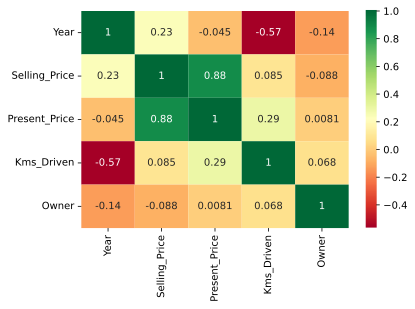

In [275]:
corr = df.corr()
sns.heatmap(data = corr, annot = True, cmap = 'RdYlGn')

In [276]:
data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']]
X = np.array(data.drop(labels = ['Selling_Price'], axis = 1))
Y = np.array(data['Selling_Price'])

In [277]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)

In [278]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print('Accuracy :', acc)

Accuracy : 0.9317431046116339


In [279]:
predict = linear.predict(x_test)
p1 = max(max(y_test), max(predict))
p2 = min(min(y_test), min(predict))

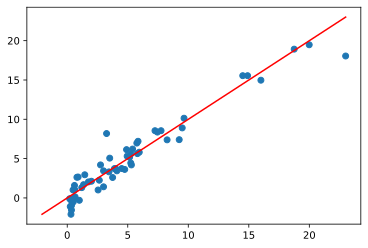

In [280]:
plt.scatter(y_test, predict)
plt.plot([p1, p2], [p1, p2], color = 'red')
plt.show()

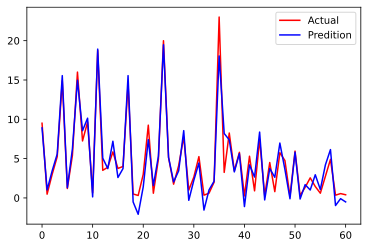

In [281]:
x_c = np.arange(len(predict))
plt.plot(x_c, y_test, color = 'red', label = 'Actual')
plt.plot(x_c, predict, color = 'blue', label = 'Predition')
plt.legend()
plt.show()